# short description of the variables

    reviewer_id: Unique identifier for each reviewer (anonymized)
    store_name: Name of the McDonald's store
    category: Category or type of the store
    store_address: Address of the store
    latitude: Latitude coordinate of the store's location
    longitude: Longitude coordinate of the store's location
    rating_count: Number of ratings/reviews for the store
    review_time: Timestamp of the review
    review: Textual content of the review
    rating: Rating provided by the reviewer



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
data=pd.read_csv('McDonald_s_Reviews.csv',encoding='latin-1')
data

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars


In [4]:
data.describe(include='all')

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
count,33396.000000,33396,33396,33396,32736.000000,32736.000000,33396,33396,33396,33396
unique,NaN,2,1,40,NaN,NaN,51,39,22285,5
top,NaN,McDonald's,Fast food restaurant,"9814 International Dr, Orlando, FL 32819, Unit...",NaN,NaN,"2,810",4 years ago,Excellent,5 stars
freq,NaN,33325,33396,1890,NaN,NaN,1140,6740,2148,10274
mean,16698.500000,NaN,NaN,NaN,34.442546,-90.647033,NaN,NaN,NaN,NaN
std,9640.739131,NaN,NaN,NaN,5.344116,16.594844,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,25.790295,-121.995421,NaN,NaN,NaN,NaN
25%,8349.750000,NaN,NaN,NaN,28.655350,-97.792874,NaN,NaN,NaN,NaN
50%,16698.500000,NaN,NaN,NaN,33.931261,-81.471414,NaN,NaN,NaN,NaN
75%,25047.250000,NaN,NaN,NaN,40.727401,-75.399919,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

In [6]:
data['store_address'].unique()

array(['13749 US-183 Hwy, Austin, TX 78750, United States',
       '1698 US-209, Brodheadsville, PA 18322, United States',
       '72-69 Kissena Blvd, Queens, NY 11367, United States',
       '429 7th Ave, New York, NY 10001, United States',
       '724 Broadway, New York, NY 10003, United States',
       '160 Broadway, New York, NY 10038, United States',
       '555 13th St NW, Washington, DC 20004, United States',
       '10451 Santa Monica Blvd, Los Angeles, CA 90025, United States',
       '114 Delancey St, New York, NY 10002, United States',
       '5920 Balboa Ave, San Diego, CA 92111, United States',
       '262 Canal St, New York, NY 10013, United States',
       '490 8th Ave, New York, NY 10001, United States',
       '550 Lawrence Expy, Sunnyvale, CA 94086, United States',
       '11382 US-441, Orlando, FL 32837, United States',
       '210 5th S, Salt Lake City, UT 84106, United States',
       '1916 M St NW, Washington, DC 20036, United States',
       "151 West 34th Street

In [7]:
data.isna().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

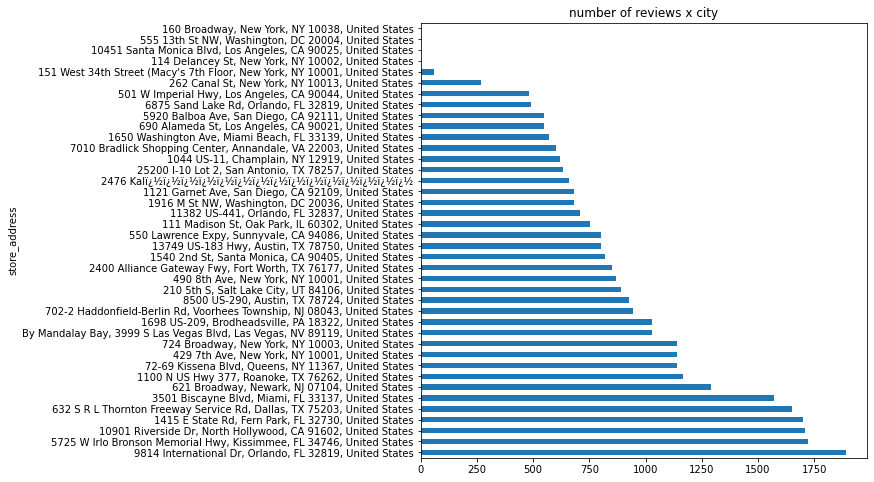

In [8]:
city_count=data['store_address'].value_counts()



plt.figure(figsize=(8, 8))
city_count.plot(kind='barh')
plt.title('number of reviews x city')
plt.show()


# here mcdonalds has asked us to carry a research on their shops in texas only detecting which shop has the larger percentage of negative review so that they can visit those shops and get an understanding of why they do have bad reviews . they also asked to generate a model which assign automaticly the review to positive or negative sentiment of the customer. they also said to ignore the rating that we already have in the dataset

In [9]:
tx_addresses = data[data['store_address'].str.contains(', TX ', case=False, na=False)]

# Display the filtered DataFrame
tx_addresses=pd.DataFrame(tx_addresses)
tx_addresses

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
32251,32252,McDonald's,Fast food restaurant,"632 S R L Thornton Freeway Service Rd, Dallas,...",32.744596,-96.812286,"2,658",a year ago,Excellent service by drivetru Very Rapids atte...,5 stars
32252,32253,McDonald's,Fast food restaurant,"632 S R L Thornton Freeway Service Rd, Dallas,...",32.744596,-96.812286,"2,658",3 years ago,"The decoration is nice, the attention is good,...",3 stars
32253,32254,McDonald's,Fast food restaurant,"632 S R L Thornton Freeway Service Rd, Dallas,...",32.744596,-96.812286,"2,658",a year ago,Ideal to go with your children to enjoy good f...,5 stars
32254,32255,McDonald's,Fast food restaurant,"632 S R L Thornton Freeway Service Rd, Dallas,...",32.744596,-96.812286,"2,658",2 years ago,They did not attend me and given the size stan...,1 star


we will also drop the columns that we will not be using in this study:


In [10]:
tx_addresses = tx_addresses.loc[:,['store_address','review']]
tx_addresses

,store_address,review
0,"13749 US-183 Hwy, Austin, TX 78750, United States",Why does it look like someone spit on my food?...
1,"13749 US-183 Hwy, Austin, TX 78750, United States",It'd McDonalds. It is what it is as far as the...
2,"13749 US-183 Hwy, Austin, TX 78750, United States",Made a mobile order got to the speaker and che...
3,"13749 US-183 Hwy, Austin, TX 78750, United States",My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...
4,"13749 US-183 Hwy, Austin, TX 78750, United States","I repeat my order 3 times in the drive thru, a..."
...,...,...
32251,"632 S R L Thornton Freeway Service Rd, Dallas,...",Excellent service by drivetru Very Rapids atte...
32252,"632 S R L Thornton Freeway Service Rd, Dallas,...","The decoration is nice, the attention is good,..."
32253,"632 S R L Thornton Freeway Service Rd, Dallas,...",Ideal to go with your children to enjoy good f...
32254,"632 S R L Thornton Freeway Service Rd, Dallas,...",They did not attend me and given the size stan...


In [11]:
tx_addresses['store_address'].value_counts()

store_address
632 S R L Thornton Freeway Service Rd, Dallas, TX 75203, United States    1650
1100 N US Hwy 377, Roanoke, TX 76262, United States                       1168
8500 US-290, Austin, TX 78724, United States                               926
2400 Alliance Gateway Fwy, Fort Worth, TX 76177, United States             850
13749 US-183 Hwy, Austin, TX 78750, United States                          800
25200 I-10 Lot 2, San Antonio, TX 78257, United States                     635
Name: count, dtype: int64

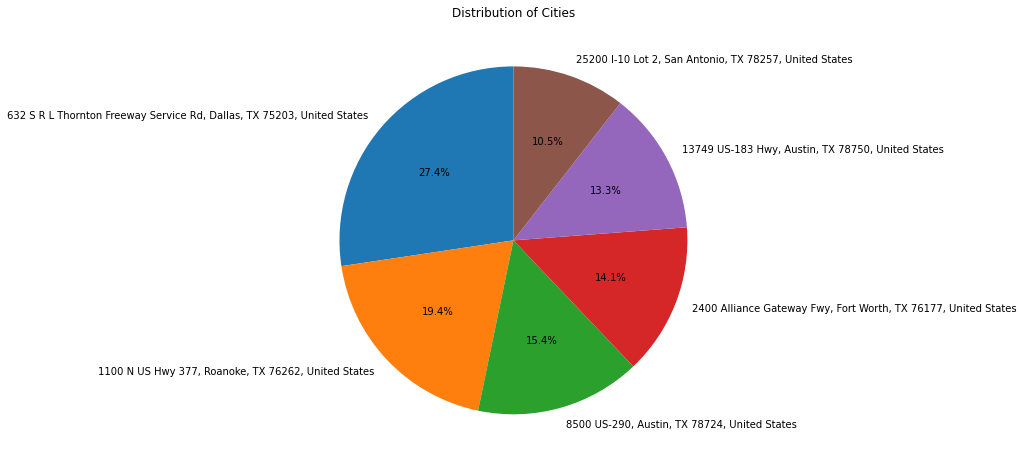

In [12]:
city_count=tx_addresses['store_address'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(city_count, labels=city_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cities')
plt.show()

In [13]:
#city with biggest number of reviews is dallas

# here mc donalds want to undestand which city restaurant in texas has the worst reviews

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment=SentimentIntensityAnalyzer()

tx_addresses['compound']= [sentiment.polarity_scores(review)['compound'] for review in tx_addresses['review']]
tx_addresses['neg']= [sentiment.polarity_scores(review)['neg'] for review in tx_addresses['review']]
tx_addresses['neu']= [sentiment.polarity_scores(review)['neu'] for review in tx_addresses['review']]
tx_addresses['pos']= [sentiment.polarity_scores(review)['pos'] for review in tx_addresses['review']]

In [15]:
tx_addresses.head()

,store_address,review,compound,neg,neu,pos
0,"13749 US-183 Hwy, Austin, TX 78750, United States",Why does it look like someone spit on my food?...,0.5215,0.027,0.879,0.094
1,"13749 US-183 Hwy, Austin, TX 78750, United States",It'd McDonalds. It is what it is as far as the...,0.8687,0.000,0.791,0.209
2,"13749 US-183 Hwy, Austin, TX 78750, United States",Made a mobile order got to the speaker and che...,-0.3535,0.051,0.949,0.000
3,"13749 US-183 Hwy, Austin, TX 78750, United States",My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,0.0000,0.000,1.000,0.000
4,"13749 US-183 Hwy, Austin, TX 78750, United States","I repeat my order 3 times in the drive thru, a...",-0.8020,0.143,0.857,0.000


In [16]:
tx_addresses[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,6029.000000,6029.000000,6029.000000,6029.000000
mean,0.162341,0.097446,0.587624,0.314761
std,0.510586,0.209407,0.356386,0.371090
min,-0.995900,0.000000,0.000000,0.000000
25%,-0.177900,0.000000,0.314000,0.000000
50%,0.296000,0.000000,0.687000,0.136000
75%,0.571900,0.106000,0.879000,0.576000
max,0.994900,1.000000,1.000000,1.000000


In [17]:
#from the above we can see that more than 50% reviews have a score more than 0.29
#suggesting that the magiority of reviews are positive

<AxesSubplot:xlabel='compound', ylabel='Count'>

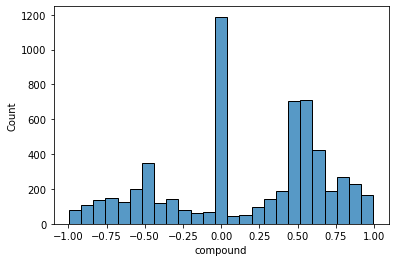

In [18]:
sns.histplot(tx_addresses['compound'])

from this chart we  can also see that there are a big number of neutral reviews in the state of texas

In [19]:
# we now group the very bad reviews based on the distribution of compound ,
#we decide to put any review with compound less than 0.5 as very bad reviews and from this
#calculate the percentage of very bad reviews from total review so that we can comunicate to
#mcdonald which one are the shops that they need to improve reviews and check in which city are they


(tx_addresses['compound']< -0.5).groupby(tx_addresses['store_address']).sum()

store_address
1100 N US Hwy 377, Roanoke, TX 76262, United States                       116
13749 US-183 Hwy, Austin, TX 78750, United States                         110
2400 Alliance Gateway Fwy, Fort Worth, TX 76177, United States             83
25200 I-10 Lot 2, San Antonio, TX 78257, United States                     80
632 S R L Thornton Freeway Service Rd, Dallas, TX 75203, United States    258
8500 US-290, Austin, TX 78724, United States                              180
Name: compound, dtype: int64

In [20]:
# here we see that Dallas has a lot of very bad reviews but to understand better
#we need to calculate the percentage of very bad reviews over the total number of reviews

In [21]:
#calculate as percentge of total reviews for very bad reviews:

percentage_negative= pd.DataFrame((tx_addresses['compound']<=-0.5).groupby(tx_addresses['store_address']).sum()
/ tx_addresses['store_address'].groupby(tx_addresses['store_address']).count()*100,
columns=['% very bad reviews']).sort_values(by='% very bad reviews')

percentage_negative

,% very bad reviews
store_address,
"2400 Alliance Gateway Fwy, Fort Worth, TX 76177, United States",9.764706
"1100 N US Hwy 377, Roanoke, TX 76262, United States",9.931507
"25200 I-10 Lot 2, San Antonio, TX 78257, United States",12.598425
"13749 US-183 Hwy, Austin, TX 78750, United States",13.750000
"632 S R L Thornton Freeway Service Rd, Dallas, TX 75203, United States",15.636364
"8500 US-290, Austin, TX 78724, United States",19.438445


In [22]:
# so we can see thatone of the 2 shops in Austin: 8500 US-290 Austin has 19% of very bad reviews.
#this is the answer that we need to give to the mcdonald.

In [27]:
#we can check which word comes more often in the very bad reviews of the Austin mcdonalds:
# to do so we will  first need to preprocess the whole texas reviews so that later we can build a model to detect if the 
# review is negative

#create stop_words english var
stop_words=nltk.corpus.stopwords.words('english')

#we first create a funtion to preprocess our text:

def preprocess_text(text):
  tokenazed_document= nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #Tokenize
  cleaned_tokens=[word.lower() for word in tokenazed_document if word.lower() not in stop_words]
  stemmed_text=[nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text

#then use the function to preprocess the reviews:
tx_addresses['processed review']=tx_addresses['review'].apply(preprocess_text)
tx_addresses

,store_address,review,compound,neg,neu,pos,processed review
0,"13749 US-183 Hwy, Austin, TX 78750, United States",Why does it look like someone spit on my food?...,0.5215,0.027,0.879,0.094,"[look, like, someon, spit, food, normal, trans..."
1,"13749 US-183 Hwy, Austin, TX 78750, United States",It'd McDonalds. It is what it is as far as the...,0.8687,0.000,0.791,0.209,"[it'd, mcdonald, far, food, atmospher, go, sta..."
2,"13749 US-183 Hwy, Austin, TX 78750, United States",Made a mobile order got to the speaker and che...,-0.3535,0.051,0.949,0.000,"[made, mobil, order, got, speaker, check, line..."
3,"13749 US-183 Hwy, Austin, TX 78750, United States",My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,0.0000,0.000,1.000,0.000,"[mc, crispi, chicken, sandwich, custom, servic..."
4,"13749 US-183 Hwy, Austin, TX 78750, United States","I repeat my order 3 times in the drive thru, a...",-0.8020,0.143,0.857,0.000,"[repeat, order, 3, time, drive, thru, still, m..."
...,...,...,...,...,...,...,...
32251,"632 S R L Thornton Freeway Service Rd, Dallas,...",Excellent service by drivetru Very Rapids atte...,0.8832,0.000,0.538,0.462,"[excel, servic, drivetru, rapid, attent, also,..."
32252,"632 S R L Thornton Freeway Service Rd, Dallas,...","The decoration is nice, the attention is good,...",0.8820,0.000,0.615,0.385,"[decor, nice, attent, good, place, need, good,..."
32253,"632 S R L Thornton Freeway Service Rd, Dallas,...",Ideal to go with your children to enjoy good f...,0.9153,0.000,0.385,0.615,"[ideal, go, children, enjoy, good, food, fun]"
32254,"632 S R L Thornton Freeway Service Rd, Dallas,...",They did not attend me and given the size stan...,-0.4767,0.075,0.925,0.000,"[attend, given, size, standard, open, enter, i..."


In [24]:
#now we index the Austin very bad reviews:

very_neg_reviews=tx_addresses.loc[(tx_addresses['store_address']=='13749 US-183 Hwy, Austin, TX 78750, United States')
                     & (tx_addresses['compound']<= -0.5),:]

very_neg_reviews.head(1)

,store_address,review,compound,neg,neu,pos,processed review
4,"13749 US-183 Hwy, Austin, TX 78750, United States","I repeat my order 3 times in the drive thru, a...",-0.802,0.143,0.857,0.0,"[repeat, order, 3, time, drive, thru, still, m..."


In [25]:
# wordcloud of words from negative reviews by product:

neg_tokens=[word for review in very_neg_reviews['processed review'] for word in review]

wordcloud= WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

# Display the generated image

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis=('off')
plt.show()

ValueError: Only supported for TrueType fonts

In [28]:
# use the nltk FreqDistr and then tabulate:



from nltk.probability import FreqDist

neg_freqdistr= FreqDist(neg_tokens)

neg_freqdistr.tabulate(30)

    order       get      time       bad    servic     drive     manag        go      food      rude      thru       one     locat       fri     wrong       ask      wait      give       got      like      back     close     place    window     never      mess      even     everi mcdonald'     alway 
       69        35        31        29        28        25        22        22        22        22        19        18        17        16        16        16        15        14        14        14        14        12        12        12        12        11        11        11        11        11 


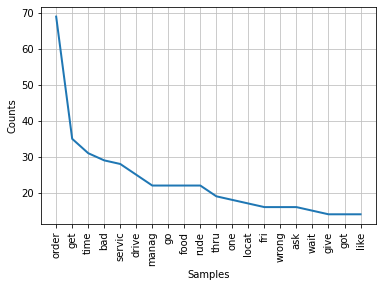

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [29]:
neg_freqdistr.plot(20)

In [30]:
# we will now create a column where we  will store if the review is positive or negative or neutral

# this way Texas mc donald will be able to use a model to detect the happiness of the customer, and if classified as
#bad review, include a gift.


threshold_negative = -0.05
threshold_positive = 0.05

def classify_sentiment(compound):
      if compound >= threshold_positive:
        return 'positive'
      elif compound <= threshold_negative:
        return 'negative'
      else:
        return 'neutral'

# Apply the function to create the 'sentiment' column
tx_addresses['sentiment'] = tx_addresses['compound'].apply(classify_sentiment)

# Display the DataFrame with sentiment labels
print(tx_addresses[['review', 'compound', 'sentiment']])

                                                  review  compound sentiment
0      Why does it look like someone spit on my food?...    0.5215  positive
1      It'd McDonalds. It is what it is as far as the...    0.8687  positive
2      Made a mobile order got to the speaker and che...   -0.3535  negative
3      My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...    0.0000   neutral
4      I repeat my order 3 times in the drive thru, a...   -0.8020  negative
...                                                  ...       ...       ...
32251  Excellent service by drivetru Very Rapids atte...    0.8832  positive
32252  The decoration is nice, the attention is good,...    0.8820  positive
32253  Ideal to go with your children to enjoy good f...    0.9153  positive
32254  They did not attend me and given the size stan...   -0.4767  negative
32255  ýýýýýýýý Terrible service... they never give y...   -0.8885  negative

[6029 rows x 3 columns]


In [31]:
#The next step is to generate our Term Frequency Matrix. We can do this using CountVectorizer in
#Scikit Learn. This takes our tokenized text and vectorizes it – we can then use this to create
#a new Data Frame which will be our features for training. We can use head() to view the first few rows of this new Data Frame.




from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(tx_addresses['processed review'].map(' '.join))
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,3877,3878,3879,3880,3881,3882,3883,3884,3885,3886
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='sentiment', ylabel='count'>

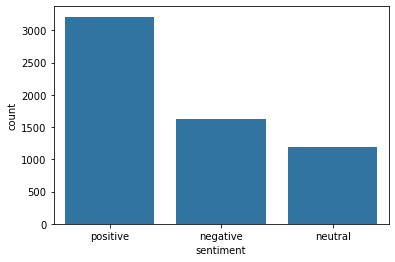

In [32]:
# check if the data is balanced:

sns.countplot(x=tx_addresses['sentiment'])

In [33]:
#split between train and test:
from sklearn.model_selection import train_test_split

y=tx_addresses['sentiment']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=99)

D:\anton\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


<AxesSubplot:xlabel='sentiment', ylabel='count'>

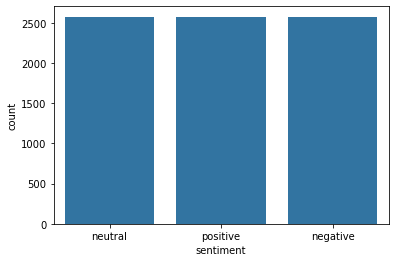

In [34]:
#smote the data:
from imblearn.over_sampling import SMOTE

resampler=SMOTE(random_state=0)
X_train_smote,y_train_smote=resampler.fit_resample(X_train,y_train)

sns.countplot(x=y_train_smote)

In [39]:
#train the model

from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)
model.fit(X_train_smote,y_train_smote)

D:\anton\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


RandomForestClassifier()

In [38]:
y_pred=model.predict(X_test)

from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:',round(acc,2))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('-----------------------------')
result= metrics.classification_report(y_test,y_pred)
print('Classification Report: \n',)
print(result)

D:\anton\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


accuracy: 0.89
Confusion Matrix:
[[299  25   9]
 [ 36 199   4]
 [ 50  13 571]] 


-----------------------------
Classification Report: 

              precision    recall  f1-score   support

    negative       0.78      0.90      0.83       333
     neutral       0.84      0.83      0.84       239
    positive       0.98      0.90      0.94       634

    accuracy                           0.89      1206
   macro avg       0.86      0.88      0.87      1206
weighted avg       0.89      0.89      0.89      1206

